# Module 6 : Performance measurements of   Support Vector Machines:

In [35]:
import pandas as pd

In [36]:
import numpy as np

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# warning
import warnings
warnings.filterwarnings("ignore")

In [39]:
# load given data
data= pd.read_csv(r'/Users/sreekarsontam/Desktop/liver/doc/liver_patient (1).csv')

In [40]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [41]:
data.duplicated().sum()

13

In [42]:
data.shape

(583, 11)

In [43]:
data = data.drop_duplicates()

In [44]:
data.shape

(570, 11)

In [45]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [46]:
df=data.dropna()

In [47]:
df.shape

(566, 11)

In [48]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [49]:
#changing feature name
df = df.rename({'Dataset': 'Result'}, axis=1) 

In [50]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [52]:
df.Result.value_counts()

1    404
2    162
Name: Result, dtype: int64

In [53]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.057542,0.010704,0.006268,0.080085,-0.084319,-0.017352,-0.195893,-0.269448,-0.215967,-0.133821
Gender,0.057542,1.000000,0.089068,0.100448,-0.024879,0.083336,0.080593,-0.092049,-0.093208,-0.005611,-0.077396
Total_Bilirubin,0.010704,0.089068,1.000000,0.873975,0.205286,0.216776,0.238167,-0.008423,-0.223979,-0.207740,-0.224467
Direct_Bilirubin,0.006268,0.100448,0.873975,1.000000,0.233653,0.236731,0.257965,-0.000735,-0.230650,-0.201519,-0.250926
Alkaline_Phosphotase,0.080085,-0.024879,0.205286,0.233653,1.000000,0.125917,0.166609,-0.028623,-0.166287,-0.236251,-0.186057
Alamine_Aminotransferase,-0.084319,0.083336,0.216776,0.236731,0.125917,1.000000,0.791754,-0.035104,-0.026890,-0.006525,-0.161617
Aspartate_Aminotransferase,-0.017352,0.080593,0.238167,0.257965,0.166609,0.791754,1.000000,-0.022114,-0.084821,-0.072899,-0.151009
Total_Protiens,-0.195893,-0.092049,-0.008423,-0.000735,-0.028623,-0.035104,-0.022114,1.000000,0.783800,0.234576,0.036443
Albumin,-0.269448,-0.093208,-0.223979,-0.230650,-0.166287,-0.026890,-0.084821,0.783800,1.000000,0.687438,0.165273
Albumin_and_Globulin_Ratio,-0.215967,-0.005611,-0.207740,-0.201519,-0.236251,-0.006525,-0.072899,0.234576,0.687438,1.000000,0.171402


In [54]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result']    

In [55]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(sampling_strategy=1,random_state=42)
x1,y1 = smk.fit_resample(X,y)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1=scaler.fit_transform(x1)
x1

array([[ 1.26146047, -1.40590273, -0.35733089, ...,  0.27949773,
         0.12074342, -0.25156283],
       [ 1.07906334,  0.71128676,  1.51110235, ...,  0.95197036,
        -0.00984124, -0.77767377],
       [ 1.07906334,  0.71128676,  0.85165533, ...,  0.47163276,
         0.12074342, -0.28444477],
       ...,
       [ 0.53187195, -1.40590273, -0.29467418, ..., -0.48247646,
        -0.5024929 , -0.5168657 ],
       [ 0.28867577,  0.71128676, -0.35733089, ...,  1.78191642,
         1.26996782,  0.07101232],
       [-0.98810414,  0.71128676, -0.35412955, ...,  0.35877604,
         0.53531898,  0.27039917]])

In [57]:
# now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score,ConfusionMatrixDisplay

In [58]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42, stratify=y1)

# Support Vector Machines:

In [59]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [60]:
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report

In [61]:
#model = pickle.load(open('/Users/sreekarsontam/Desktop/liver/codes/sv.h5', 'rb'))

In [62]:
from sklearn.svm import SVC 

In [63]:
ypred = clf.predict(X_test)

In [64]:
accuracy_score(y_test, ypred)

0.7641921397379913

In [65]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.92      0.58      0.71       115
           2       0.69      0.95      0.80       114

    accuracy                           0.76       229
   macro avg       0.81      0.76      0.76       229
weighted avg       0.81      0.76      0.76       229



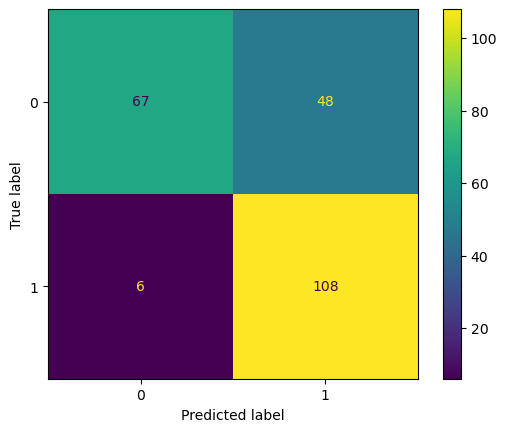

In [66]:
cm=confusion_matrix(y_test,ypred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

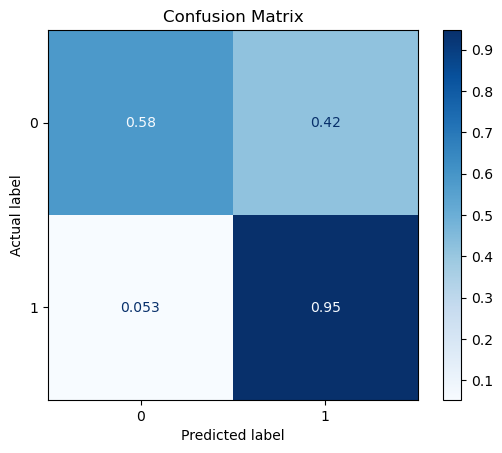

In [67]:
from sklearn.metrics import plot_confusion_matrix 
cmd = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['0' ,'1'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.ylabel('Actual label');

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score
pd.DataFrame(data=[accuracy_score(y_test, ypred), recall_score(y_test, ypred),
                   precision_score(y_test, ypred), roc_auc_score(y_test, ypred),f1_score(y_test,ypred)], 
                   index=["accuracy", "recall", "precision", "roc_auc_score","f1_score"])

,0
accuracy,0.764192
recall,0.582609
precision,0.917808
roc_auc_score,0.764989
f1_score,0.712766
